# Analyse de base des fichiers éducation nationnale. 
Objectif : voir les données, trouvé des pistes pour comprendre l'echec scolaire.

In [1]:
# import bibliothéques d'analyse de python
# voir pour utiliser black dans les cellules python pour améliorer la qualité du code
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


In [2]:
# import des données en RAM avec pandas
effectif_prim = pd.read_csv("donnee/fr-en-ecoles-effectifs-nb_classes.csv",sep=";")
effectif_colleges = pd.read_csv("donnee/fr-en-college-effectifs-niveau-sexe-lv.csv",sep=";")
collegue_stat = pd.read_csv("donnee/fr-en-ips-colleges-ap2022.csv",sep=";")
ecole_stat = pd.read_csv("donnee/fr-en-ips-ecoles-ap2022.csv",sep=";")

## Affichage des entêtes des données
Pour les écoles primaires :

In [3]:
effectif_prim.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,tri,code_postal
0,2022,AUVERGNE-ET-RHONE-ALPES,CLERMONT-FERRAND,ALLIER,ABREST,0030701W,ECOLE PRIMAIRE PUBLIQUE,NaN,PUBLIC,0,...,56,108,0,16,22,18,31,21,78-AUVERGNE-ET-RHONE-ALPES-CLERMONT-FERRAND-AL...,3200


In [4]:
ecole_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips
0,2022-2023,LYON,069,RHONE,0691092M,ECOLE PRIMAIRE,69074,DENICE,public,85.0,119.0


Pour les collèges :

In [5]:
effectif_colleges.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_college,denomination_principale,patronyme,secteur,rep,...,3eme_lv1_allemand,3eme_lv1_anglais,3eme_lv1_espagnol,3eme_lv1_autres,3eme_lv2_allemand,3eme_lv2_anglais,3eme_lv2_espagnol,3eme_lv2_italien,3eme_lv2_autres,code_postal
0,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,VILLEURBANNE,0691664J,COLLEGE,JEAN JAURES,PUBLIC,1,...,0,175,0,0,26,0,131,14,0,69100.0


In [6]:
collegue_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips,ecart_type_de_l_ips
0,2022-2023,LYON,001,AIN,0010002X,COLLEGE SAINT EXUPERY,01004,AMBERIEU EN BUGEY,public,686.0,95.3,34.2


# premier nettoyage

Standariser les catègories public privé dans la colonne secteur.<br>
Standariser les rentrées scolaires<br>
Voir pour réduire le nombre de colonne des fichiers.<br>
colone tri dans effectif ecole<br>
college voir pour aggreger les classes. (langue séparé, est ce utile pour stats generale ?)<br>


In [7]:
collegue_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [8]:
effectif_colleges['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [9]:
ecole_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [10]:
effectif_prim['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [11]:
# changement dans les data ecole_stat['secteur'] et college_stat['secteur']
# Les valeurs doivent être PRIVE ou PUBLIC
collegue_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)
ecole_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)

In [12]:
effectif_colleges['rentree_scolaire'].unique()

array([2019, 2020, 2022, 2021])

In [13]:
collegue_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [14]:
effectif_prim['rentree_scolaire'].unique()

array([2022, 2021, 2020, 2019])

In [15]:
ecole_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [16]:
# remplacer dans les données ecoles_stat et college_stat colonne rentree_scoalire 2022-2023 par 2022
collegue_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)
ecole_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)

In [17]:
effectif_prim.drop(columns='tri',inplace=True)

In [18]:
# patronyme contient des Nan remplcer par un espaces
effectif_prim['patronyme'].fillna(" ",inplace=True)

In [19]:
effectif_prim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194898 entries, 0 to 194897
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   rentree_scolaire                        194898 non-null  int64 
 1   region_academique                       194898 non-null  object
 2   academie                                194898 non-null  object
 3   departement                             194898 non-null  object
 4   commune                                 194898 non-null  object
 5   numero_ecole                            194898 non-null  object
 6   denomination_principale                 194897 non-null  object
 7   patronyme                               194898 non-null  object
 8   secteur                                 194898 non-null  object
 9   rep                                     194898 non-null  int64 
 10  rep_plus                                194898 non-null 

In [20]:
effectif_prim[effectif_prim['numero_ecole'] == '0691092M']

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal
5168,2022,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,104,40,64,0,17,15,9,9,14,69640
53422,2021,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,113,50,63,0,13,9,9,14,18,69640
102029,2020,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,107,45,62,0,8,7,14,17,16,69640
150994,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,110,37,73,0,8,14,18,17,16,69640


In [21]:
fichier_ecole_elementaire = pd.merge(ecole_stat,effectif_prim,left_on=['rentree_scolaire','uai'],right_on=['rentree_scolaire','numero_ecole'],how='outer')

In [22]:
fichier_ecole_elementaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194898 entries, 0 to 194897
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   rentree_scolaire                        194898 non-null  int64  
 1   academie_x                              30059 non-null   object 
 2   code_du_departement                     30059 non-null   object 
 3   departement_x                           30059 non-null   object 
 4   uai                                     30059 non-null   object 
 5   nom_de_l_etablissment                   30059 non-null   object 
 6   code_insee_de_la_commune                30059 non-null   object 
 7   nom_de_la_commune                       30059 non-null   object 
 8   secteur_x                               30059 non-null   object 
 9   effectifs                               30059 non-null   float64
 10  ips                                     3005

In [23]:
# supression colonne en double
fichier_ecole_elementaire.drop(columns=['academie_y','departement_y','secteur_y'],inplace=True)
# renomme les colonnes avec un _x
fichier_ecole_elementaire.rename(columns={'academie_x':'academie','departement_x':'departement','secteur_x':'secteur'},inplace=True)

In [24]:
# création fichier college
fichier_college = pd.merge(effectif_colleges,collegue_stat,left_on=['rentree_scolaire','numero_college'],right_on=['rentree_scolaire','uai'],how='outer')

In [25]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32982 entries, 0 to 32981
Data columns (total 87 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32982 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie_x                                32982 non-null  object 
 3   departement_x                             32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   numero_college                            32982 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur_x                                 32982 non-null  object 
 9   rep                                       32982 non-null  int64  
 10  rep_plus                          

In [26]:
# supprime les colonnes en trop (doublons)
fichier_college.drop(columns=['academie_y','departement_y','secteur_y'],inplace=True)
# renomme les colonnes avec un _x
fichier_college.rename(columns={'academie_x':'academie','departement_x':'departement','secteur_x':'secteur'},inplace=True)

## premier graphes généraux:
voir l évolution des effectifs globale des effectifs en primaire<br>
voir la repartition dans les classes en 2022<br>

In [27]:
# style graphe :
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")

In [28]:
france_ecole = fichier_ecole_elementaire.groupby(by='rentree_scolaire').sum(numeric_only=True)

In [39]:
france_ecole.head()

,effectifs,ips,rep,rep_plus,nombre_total_classes,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal
rentree_scolaire,,,,,,,,,,,,,,,
2019,0.0,0.0,4208,2455,294261,6653465,2441820,4160847,50798,827029,833242,831215,835383,833978,2627935323
2020,0.0,0.0,4189,2458,296560,6565847,2374980,4137960,52907,823870,820717,831154,824201,838018,2617169842
2021,0.0,0.0,4168,2458,297010,6481517,2337371,4090022,54124,804533,819138,817486,822840,826025,2598162900
2022,3812643.0,3133330.1,4152,2456,296963,6422791,2314893,4052461,55437,790617,801485,820246,813113,827000,2580389098


In [40]:
france_ecole["Nombre_eleves_par_classe_moyenne"] = france_ecole['nombre_total_eleves'] / france_ecole['nombre_total_classes']

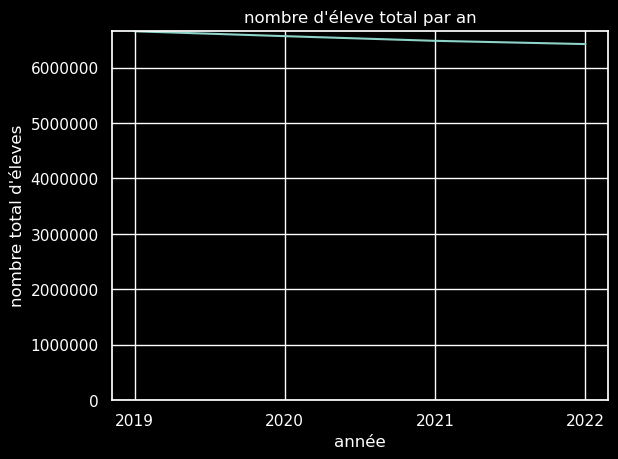

In [47]:
#faire un graphe qui montre le nombre d'eleve
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_eleves',ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()


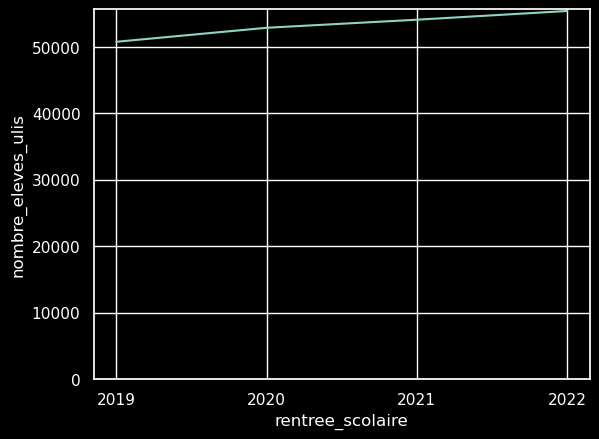

In [31]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_eleves_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0)
plt.show()

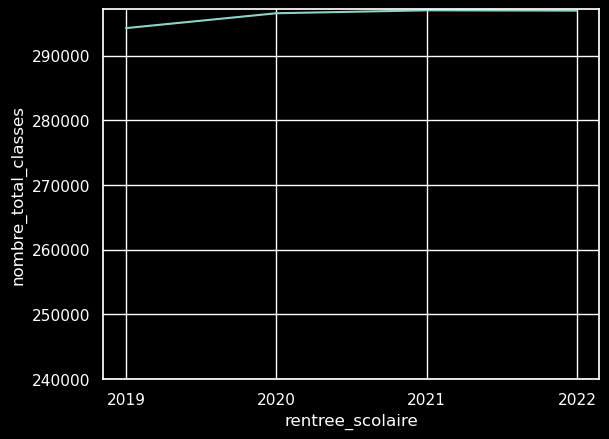

In [38]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_classes',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(240000)
plt.show()

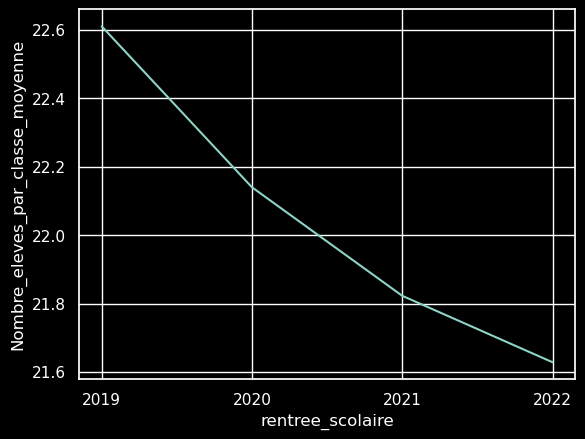

In [43]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim()
plt.show()